In [91]:
import pandas as pd
import numpy as np
df=pd.read_csv('Titanic-Dataset.csv')

In [92]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [94]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [95]:
df['Sex_encoded']=df['Sex'].map({'male': 1, 'female': 0})

#### here we are handiling null values

In [96]:
df.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
Sex_encoded    891
dtype: int64

In [97]:
df['Age'].isnull().sum()

np.int64(177)

In [98]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\harya\AppData\Local\Temp\ipykernel_4212\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [99]:
df.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
Sex_encoded    891
dtype: int64

In [100]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

C:\Users\harya\AppData\Local\Temp\ipykernel_4212\3717664479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [101]:
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [102]:
df.to_csv('titanic_clean.csv', index=False)

In [103]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.drop(['Sex', 'Embarked', 'SibSp', 'Parch'], axis=1, inplace=True)

Survived       1.000000
Fare           0.257307
FamilySize     0.016639
Age           -0.069809
Pclass        -0.338481
Sex_encoded   -0.543351
Name: Survived, dtype: float64


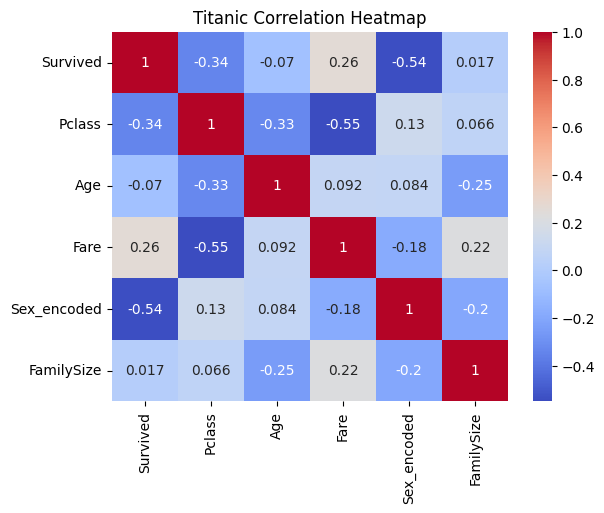

In [104]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
print(corr_matrix['Survived'].sort_values(ascending=False))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Titanic Correlation Heatmap')
plt.show()

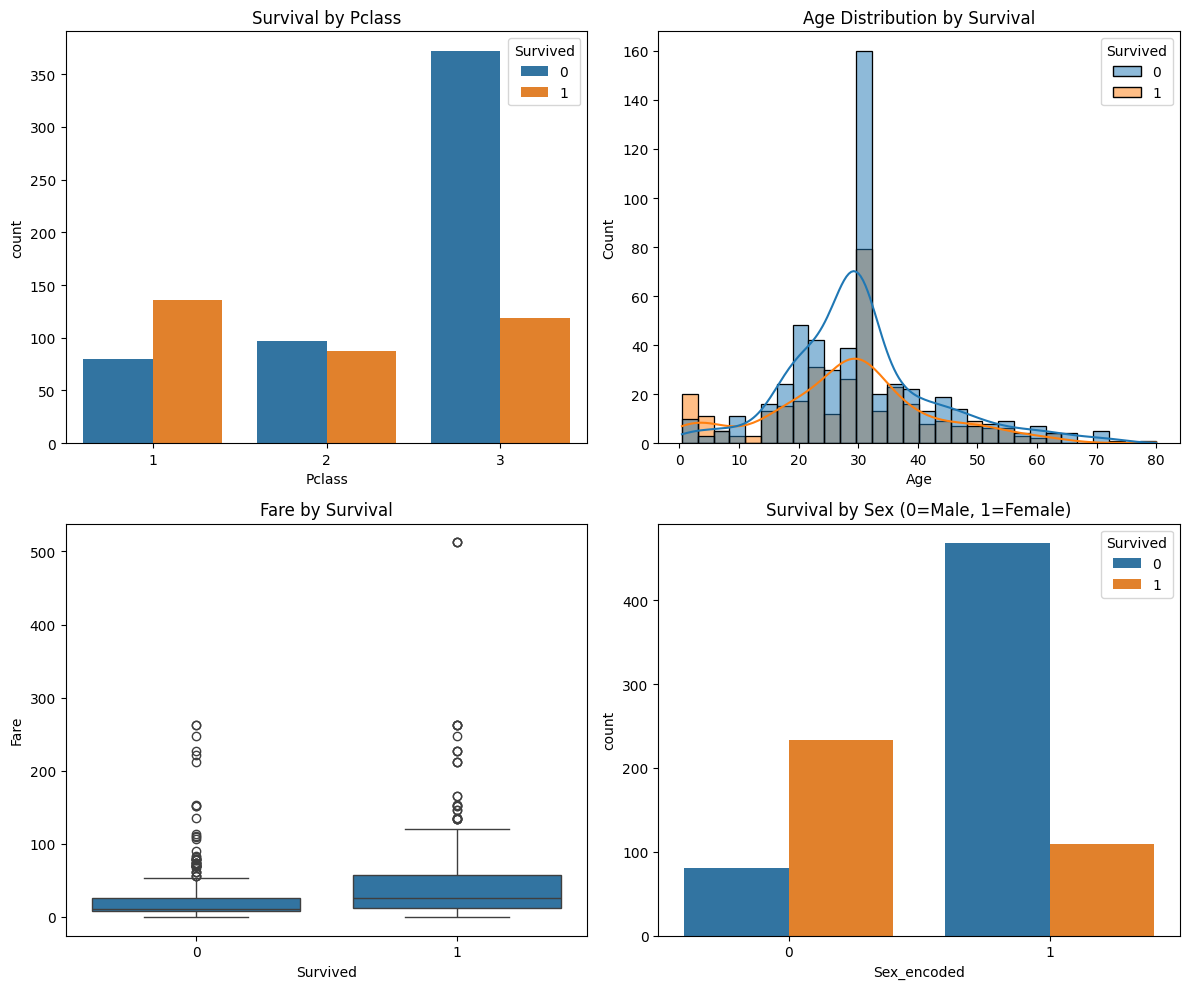

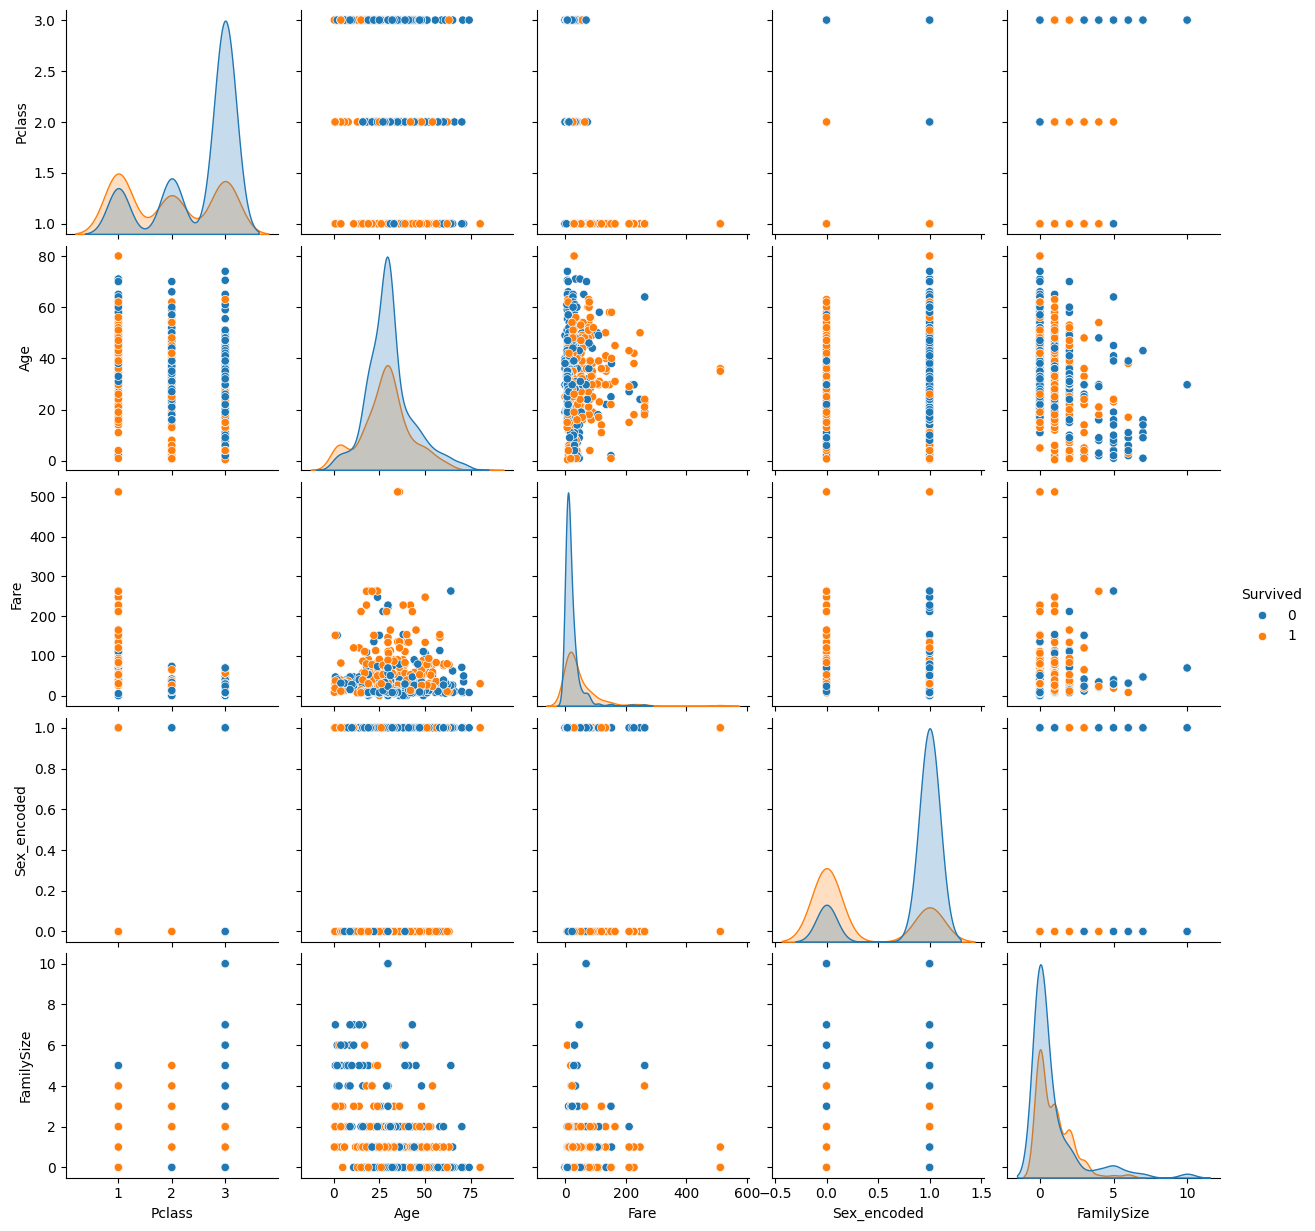

In [105]:
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Pclass')

plt.subplot(2,2,2)
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')

plt.subplot(2,2,3)
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Fare by Survival')

plt.subplot(2,2,4)
sns.countplot(data=df, x='Sex_encoded', hue='Survived')
plt.title('Survival by Sex (0=Male, 1=Female)')

plt.tight_layout()
plt.show()

sns.pairplot(numeric_df, hue='Survived')
plt.show()


#### key analysis
1. Gender matters for survival.
2. the adults have more survival chance then child and senoirs.
3. the higher the passenger class more their survival chance.
4. the people who paid more fare they survived more.

In [106]:
df.to_csv('titanic_clean1.csv', index=False)